This notebook provides for a visual check of ms1 and ms2 peak centroids

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
from scipy.signal import correlate

In [3]:
database_name = 'z:/wilding-mcbride/processing/UPS2_MS1_MS2_ratio_experiment_20180621_1xMS2/UPS2_MS1_MS2_ratio_experiment_20180621_1xMS2-features-11359-12980.sqlite'

In [41]:
source_conn = sqlite3.connect(database_name)
max_peak_id_df = pd.read_sql_query("select max(peak_id) from ms1_feature_region_peaks where feature_id={}".format(feature_id), source_conn)
source_conn.close()
max_peak_id_df

,max(peak_id)
0,3


In [48]:
feature_id = 11359
ms1_peak_id = 2

In [49]:
source_conn = sqlite3.connect(database_name)
ms1_peaks_df = pd.read_sql_query("select centroid_scan from ms1_feature_region_peaks where feature_id={} and peak_id={}".format(feature_id,ms1_peak_id), source_conn)
source_conn.close()

In [80]:
peak_centroid = ms1_peaks_df.loc[0].centroid_scan
peak_centroid

118.66852632915321

In [51]:
source_conn = sqlite3.connect(database_name)
ms1_peak_points_df = pd.read_sql_query("select * from summed_ms1_regions where feature_id={} and peak_id={}".format(feature_id,ms1_peak_id), source_conn)
source_conn.close()

In [52]:
ms1_peak_points_df

,feature_id,point_id,mz,scan,intensity,number_frames,peak_id
0,11359,2,784.248627,110,1312,1,2
1,11359,4,784.246360,111,3746,2,2
2,11359,6,784.240276,112,1902,1,2
3,11359,9,784.261135,113,4881,3,2
4,11359,12,784.261672,114,6860,3,2
5,11359,16,784.252139,115,2681,2,2
6,11359,18,784.258161,116,12939,3,2
7,11359,21,784.265874,117,16812,3,2
8,11359,23,784.261448,118,11350,3,2
9,11359,27,784.239576,119,1198,1,2


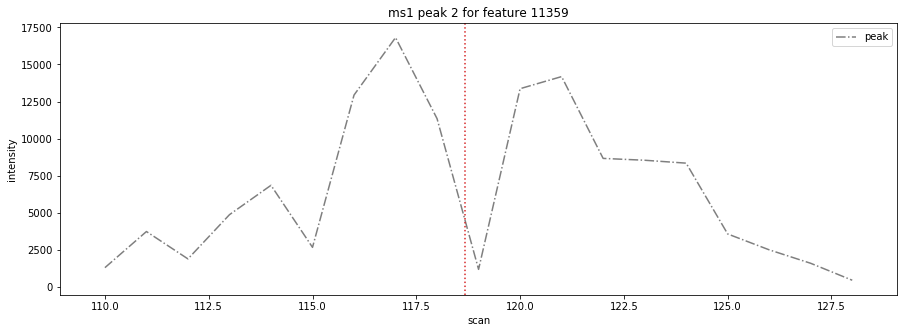

In [53]:
fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(ms1_peak_points_df.scan, ms1_peak_points_df.intensity, marker='', linestyle='-.', ms=5, color='tab:gray', label='peak')
plt.axvline(x=peak_centroid, linestyle=':', color='tab:red')
plt.legend(loc='best')
ax1.set_ylabel('intensity')
ax1.set_xlabel('scan')
plt.title("ms1 peak {} for feature {}".format(ms1_peak_id,feature_id))
plt.margins(0.06)
plt.show()

In [54]:
source_conn = sqlite3.connect(database_name)
max_peak_id_df = pd.read_sql_query("select max(peak_id) from ms2_peaks where feature_id={}".format(feature_id), source_conn)
source_conn.close()
max_peak_id_df

,max(peak_id)
0,36076


In [73]:
ms2_peak_id = 5000

In [74]:
source_conn = sqlite3.connect(database_name)
ms2_peaks_df = pd.read_sql_query("select centroid_scan from ms2_peaks where feature_id={} and peak_id={}".format(feature_id,ms2_peak_id), source_conn)
source_conn.close()

In [75]:
ms2_centroid_scan = ms2_peaks_df.loc[0].centroid_scan

In [76]:
source_conn = sqlite3.connect(database_name)
ms2_peak_points_df = pd.read_sql_query("select * from summed_ms2_regions where feature_id={} and peak_id={}".format(feature_id,ms2_peak_id), source_conn)
source_conn.close()

In [77]:
ms2_peak_points_df

,feature_id,peak_id,point_id,mz,scan,intensity
0,11359,5000,129975,515.203,106,4463
1,11359,5000,129976,515.203,107,2054
2,11359,5000,129977,515.203,108,3773
3,11359,5000,129978,515.203,109,3481
4,11359,5000,129979,515.203,110,3002
5,11359,5000,129980,515.203,111,5291
6,11359,5000,129981,515.203,112,2479
7,11359,5000,129982,515.203,113,2554
8,11359,5000,129983,515.203,114,3324
9,11359,5000,129984,515.203,115,1236


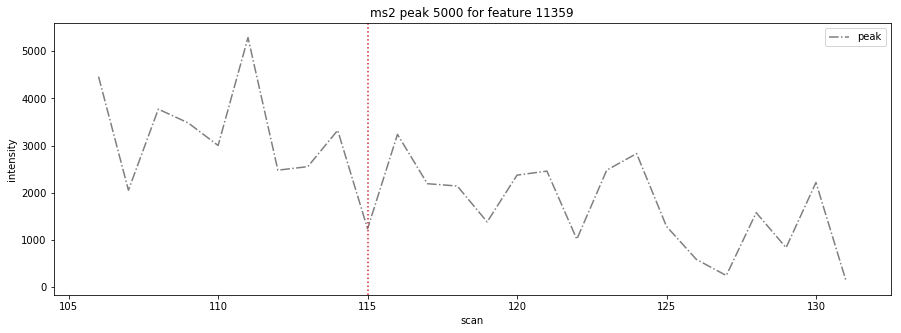

In [78]:
fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.plot(ms2_peak_points_df.scan, ms2_peak_points_df.intensity, marker='', linestyle='-.', ms=5, color='tab:gray', label='peak')
plt.axvline(x=ms2_centroid_scan, linestyle=':', color='tab:red')
plt.legend(loc='best')
ax1.set_ylabel('intensity')
ax1.set_xlabel('scan')
plt.title("ms2 peak {} for feature {}".format(ms2_peak_id,feature_id))
plt.margins(0.06)
plt.show()